In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math
import sys
sys.path.append("D:/ryanh/github/ripple_analyses")
from functions import *


Bad key "text.kerning_factor" on line 4 in
D:\ryanh\Anaconda3\envs\ripple_analysis\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'


import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

https://github.com/neilernst/cliffsDelta

In [3]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size

def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

# load in data

In [4]:
csv_path = 'F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/'

df = pd.read_csv(csv_path+'swr_df.csv')
df_inter_ripple = pd.read_csv(csv_path+'df_ripple_rate.csv')

### remove events from cortex

In [12]:
idx = df.area == 'cortex'
df = df[~(idx)]

idx = df_inter_ripple.area == 'cortex'
df_inter_ripple = df_inter_ripple[~(idx)]

<ipython-input-21-1e58a7288ec5>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inter_ripple['ripple_rate_log10'] = np.log10(df_inter_ripple.ripple_rate)


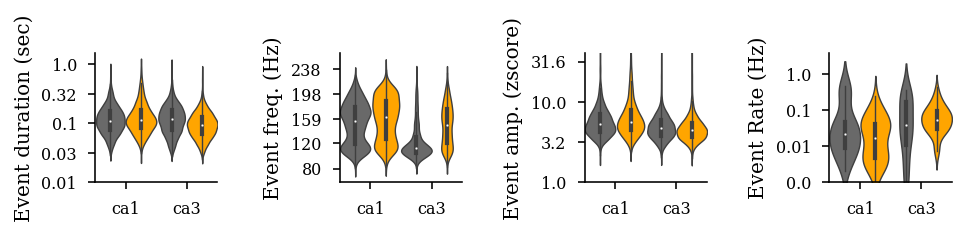

In [21]:
# epoch_idx = ((df.ep_type == 'track') | (df.ep_type == 'pedestal_1') | (df.ep_type == 'pedestal_2'))
# epoch = "track_pedstal"
epoch_idx = (df.ep_type == df.ep_type) & (df.area == 'ca1')
epoch_df_inter_ripple_idx = (df_inter_ripple.area == 'ca1')

epoch = "all"


def log_y_axis(ax,y,round_n=2,n_steps=5):
    """
    function to space Y axis in log scale without logging y values
    """
    y_log = np.linspace(math.floor(min(y)),math.ceil(max(y)),n_steps)
    ax.set_yticks(y_log)
    ax.set_yticklabels(np.round(10**y_log,round_n))
    
fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.3, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=1)
axs = axs.ravel()

# set params
x = 'group'
linewidth = .7
# linewidth=0
width = 1

# Create an array with the colors you want to use
colors = ['dimgrey','#ffa500ff']
# colors = ['w','orange']

# colors = ['dimgrey','gold']


# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
#  palette="Pastel1"
# sns.set_palette(sns.color_palette("Pastel1"))


# plot
df['ripple_duration_log10'] = np.log10(df.ripple_duration)
axs[0] = sns.violinplot(x="area", y="ripple_duration_log10",hue='group', data=df,
               linewidth=linewidth,width=width,ax=axs[0],saturation=1)
axs[0].get_legend().set_visible(False)
axs[0].set_ylabel('Event duration (sec)')
log_y_axis(axs[0],df.ripple_duration_log10)   
axs[0].set_ylim(bottom=np.log10(0.01))



axs[1] = sns.violinplot(x="area", y="peak_freq",hue='group', data=df,
               linewidth=linewidth,width=width,ax=axs[1],saturation=1)
axs[1].get_legend().set_visible(False)
axs[1].set_yticks(np.round(np.linspace(math.floor(min(df.peak_freq)),math.ceil(max(df.peak_freq)),5)))
axs[1].set_ylabel('Event freq. (Hz)')



df['peak_amplitude_log10'] = np.log10(df.peak_amplitude)
axs[2] = sns.violinplot(x="area", y="peak_amplitude_log10",hue='group', data=df, # make so less than 20
               linewidth=linewidth,width=width,ax=axs[2],saturation=1)
axs[2].get_legend().set_visible(False)
log_y_axis(axs[2],df.peak_amplitude_log10,round_n=1,n_steps=7)   
axs[2].set_ylim(top=np.log10(40))
axs[2].set_ylabel('Event amp. (zscore)')


df_inter_ripple['ripple_rate_log10'] = np.log10(df_inter_ripple.ripple_rate)
axs[3] = sns.violinplot(x="area", y="ripple_rate_log10",hue='group', data=df_inter_ripple,
               linewidth=linewidth,width=width,ax=axs[3],saturation=1)
axs[3].get_legend().set_visible(False)
log_y_axis(axs[3],df_inter_ripple.ripple_rate_log10)   
axs[3].set_ylim(bottom=np.log10(0.001))
axs[3].set_ylabel('Event Rate (Hz)')


# clean up  box
for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].set_xlabel('')

save_path = "D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_section/"
plt.savefig(save_path+'ripple_features_'+epoch+'.svg',dpi=900,bbox_inches='tight')
plt.savefig(save_path+'ripple_features_'+epoch+'.pdf',dpi=900,bbox_inches='tight')

In [7]:
# epoch_idx = ((df.ep_type == 'track') | (df.ep_type == 'pedestal_1') | (df.ep_type == 'pedestal_2'))

epoch_idx = (df.ep_type == df.ep_type) & (df.area == 'ca3')
epoch_df_inter_ripple_idx = (df_inter_ripple.area == 'ca3')

print("ripple_duration",cliffsDelta(df.ripple_duration[epoch_idx & (df.group == "control")], df.ripple_duration[epoch_idx & (df.group == "pae")]))

print("peak_freq",cliffsDelta(df.peak_freq[epoch_idx & (df.group == "control")], df.peak_freq[epoch_idx & (df.group == "pae")]))

print("peak_amplitude",cliffsDelta(df.peak_amplitude[epoch_idx & (df.group == "control")], df.peak_amplitude[epoch_idx & (df.group == "pae")]))

print("ripple_rate",cliffsDelta(df_inter_ripple.ripple_rate[epoch_df_inter_ripple_idx & (df_inter_ripple.group == "control")],
                  df_inter_ripple.ripple_rate[epoch_df_inter_ripple_idx & (df_inter_ripple.group == "pae")]))

ripple_duration (0.22917287757767713, 'small')
peak_freq (-0.5012656842893565, 'large')
peak_amplitude (0.09401401340523283, 'negligible')
ripple_rate (-0.11310344827586206, 'negligible')


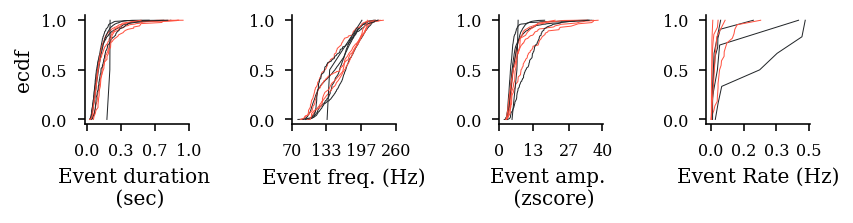

In [24]:
# from statsmodels.distributions.empirical_distribution import ECDF

# group_colors = {"control": 'dimgrey', "pae": '#ffa500ff'} 
group_colors = {"controlca1": '#0571b0',
                "controlca3": '#92c5de',
                'paeca1': '#ca0020',
                'paeca3': '#f4a582'} 

group_colors = {"controlca1": '#4a536b',
                "controlca3": '#aed6dc',
                'paeca1': '#ff9a8d',
                'paeca3': '#f4a582'} 

group_colors = {"controlca1": '#1a1d21ff',
                "controlca3": '#222629ff',
                'paeca1': '#db6668ff',
                'paeca3': '#d39b46ff'} 

group_colors = {"controlca1": '#222629ff',
                "controlca3": '#103876ff',
                'paeca1': '#ff5240ff',
                'paeca3': '#ebad46ff'} 
def ecdf(x):
    xs = np.sort(x)
#     ys = np.arange(1, len(xs)+1)/float(len(xs))
    ys = np.linspace(0,1,len(xs))
    return xs, ys


def plot_ecdf(var,df,area,ax,group_colors):
    for rat in pd.unique(df.rat):
        y = df[(df.rat == rat) & (df.area == area)]
        if y.empty == False:
#             ecdf = ECDF(y[var])
            xs, ys = ecdf(y[var])
            ax.plot(xs,ys,color=group_colors[y.group.iloc[0]+y.area.iloc[0]],linewidth=.5)

            
fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.1, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=1)
axs = axs.ravel()

plot_ecdf('ripple_duration',df,'ca1',axs[0],group_colors)
start, end = axs[0].get_xlim()
axs[0].xaxis.set_ticks((np.linspace(0, 1, 4)))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
axs[0].set_xlabel('Event duration \n (sec)')
axs[0].set_ylabel('ecdf')

plot_ecdf('peak_freq',df,'ca1',axs[1],group_colors)
axs[1].xaxis.set_ticks(np.round(np.linspace(70, 260, 4)))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
axs[1].set_xlabel('Event freq. (Hz)')

plot_ecdf('peak_amplitude',df[df.peak_amplitude < 40],'ca1',axs[2],group_colors)
axs[2].xaxis.set_ticks(np.round(np.linspace(0, 40, 4)))
axs[2].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
axs[2].set_xlabel('Event amp. \n (zscore)')

plot_ecdf('ripple_rate',df_inter_ripple,'ca1',axs[3],group_colors)
axs[3].xaxis.set_ticks((np.linspace(0, .5, 4)))
axs[3].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
axs[3].set_xlabel('Event Rate (Hz)')

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    
save_path = "D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_section/"
plt.savefig(save_path+'ripple_features_cdf_ca1.svg',dpi=900,bbox_inches='tight')
plt.savefig(save_path+'ripple_features_cdf_ca1.png',dpi=300,bbox_inches='tight')

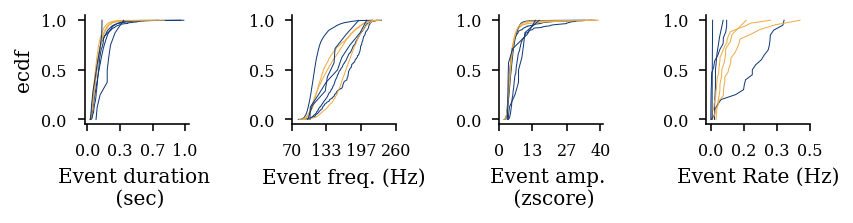

In [25]:
fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.1, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=1)
axs = axs.ravel()

plot_ecdf('ripple_duration',df,'ca3',axs[0],group_colors)
start, end = axs[0].get_xlim()
axs[0].xaxis.set_ticks((np.linspace(0, 1, 4)))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
axs[0].set_xlabel('Event duration \n (sec)')
axs[0].set_ylabel('ecdf')

plot_ecdf('peak_freq',df,'ca3',axs[1],group_colors)
axs[1].xaxis.set_ticks(np.round(np.linspace(70, 260, 4)))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
axs[1].set_xlabel('Event freq. (Hz)')

plot_ecdf('peak_amplitude',df[df.peak_amplitude < 40],'ca3',axs[2],group_colors)
axs[2].xaxis.set_ticks(np.round(np.linspace(0, 40, 4)))
axs[2].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
axs[2].set_xlabel('Event amp. \n (zscore)')

plot_ecdf('ripple_rate',df_inter_ripple,'ca3',axs[3],group_colors)
axs[3].xaxis.set_ticks((np.linspace(0, .5, 4)))
axs[3].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
axs[3].set_xlabel('Event Rate (Hz)')

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    
save_path = "D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_section/"
plt.savefig(save_path+'ripple_features_cdf_ca3.svg',dpi=900,bbox_inches='tight')
plt.savefig(save_path+'ripple_features_cdf_ca3.png',dpi=900,bbox_inches='tight')

In [74]:
df_inter_ripple

,Unnamed: 0,session,area,counts,ripple_rate,group,rat,ripple_rate_log10
0,0,LEM3116_S20180715121821,ca1,11,0.010138,control,LEM3116,-1.994038
1,1,LEM3116_S20180715160836,ca1,40,0.035514,control,LEM3116,-1.449606
2,2,LEM3116_S20180716115155,ca1,7,0.017809,control,LEM3116,-1.749352
3,3,LEM3116_S20180716174306,ca1,31,0.021395,control,LEM3116,-1.669697
4,4,LEM3116_S20180717110938,ca1,438,0.216545,control,LEM3116,-0.664451
...,...,...,...,...,...,...,...,...
216,216,RH16_S20161021165052,ca1,1,0.006446,pae,RH16,-2.190725
217,217,RH16_S20161030145324,ca1,5,0.022714,pae,RH16,-1.643710
218,218,RH16_S20161126145021,ca1,1,0.012127,pae,RH16,-1.916240
219,219,RH16_S20161126150318,ca1,3,0.029756,pae,RH16,-1.526431


<ipython-input-103-b08077a03883>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inter_ripple['ripple_rate_log'] = np.log10(df_inter_ripple.ripple_rate)
<ipython-input-103-b08077a03883>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inter_ripple['ripple_rate_log'] = np.log10(df_inter_ripple.ripple_rate)


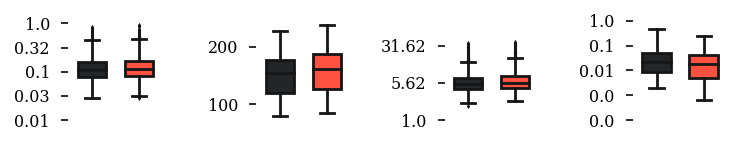

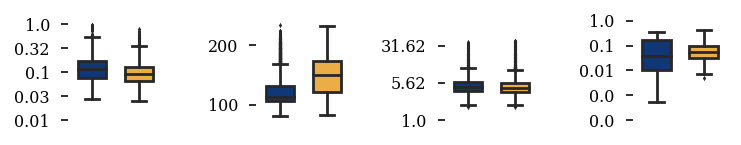

In [103]:

# Set your custom color palette
sns.set_palette(sns.color_palette([group_colors['controlca1'],group_colors['paeca1']]))

fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=1)
axs = axs.ravel()

df['ripple_duration_log'] = np.log10(df.ripple_duration)
g=sns.boxplot(x="group", y="ripple_duration_log", data=df[df.area=='ca1'],
            width=.6,ax=axs[0],saturation=1,fliersize=.5)
log_y_axis(axs[0],df.ripple_duration_log)   
axs[0].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

g=sns.boxplot(x="group", y="peak_freq", data=df[df.area=='ca1'],
            width=.6,ax=axs[1],saturation=1,fliersize=.5)
axs[1].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

df['peak_amplitude_log'] = np.log10(df.peak_amplitude)
g = sns.boxplot(x="group", y="peak_amplitude_log", data=df[(df.area=='ca1') & (df.peak_amplitude<40)],
            width=.6,ax=axs[2],saturation=1,fliersize=.5)
log_y_axis(axs[2],df.peak_amplitude_log)   
axs[2].set_ylim(0,2)
axs[2].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

df_inter_ripple['ripple_rate_log'] = np.log10(df_inter_ripple.ripple_rate)
g = sns.boxplot(x="group", y="ripple_rate_log", data=df_inter_ripple[df_inter_ripple.area=='ca1'],
            width=.6,ax=axs[3],saturation=1,fliersize=.5)
log_y_axis(axs[3],df_inter_ripple.ripple_rate_log)   
axs[3].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

sns.despine(trim=True, left=True, bottom=True)

plt.savefig(save_path+'ripple_features_box_plot_ca1.svg',dpi=900,bbox_inches='tight')




sns.set_palette(sns.color_palette([group_colors['controlca3'],group_colors['paeca3']]))

fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=1)
axs = axs.ravel()

df['ripple_duration_log'] = np.log10(df.ripple_duration)
g=sns.boxplot(x="group", y="ripple_duration_log", data=df[df.area=='ca3'],
            width=.6,ax=axs[0],saturation=1,fliersize=.5)
log_y_axis(axs[0],df.ripple_duration_log)   
axs[0].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

g=sns.boxplot(x="group", y="peak_freq", data=df[df.area=='ca3'],
            width=.6,ax=axs[1],saturation=1,fliersize=.5)
axs[1].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

df['peak_amplitude_log'] = np.log10(df.peak_amplitude)
g = sns.boxplot(x="group", y="peak_amplitude_log", data=df[(df.area=='ca3') & (df.peak_amplitude<40)],
            width=.6,ax=axs[2],saturation=1,fliersize=.5)
log_y_axis(axs[2],df.peak_amplitude_log)   
axs[2].set_ylim(0,2)
axs[2].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

df_inter_ripple['ripple_rate_log'] = np.log10(df_inter_ripple.ripple_rate)
g = sns.boxplot(x="group", y="ripple_rate_log", data=df_inter_ripple[df_inter_ripple.area=='ca3'],
            width=.6,ax=axs[3],saturation=1,fliersize=.5)
log_y_axis(axs[3],df_inter_ripple.ripple_rate_log)   
axs[3].axes.get_xaxis().set_ticks([])
g.set(xlabel=None)
g.set(ylabel=None)

sns.despine(trim=True, left=True, bottom=True)

plt.savefig(save_path+'ripple_features_box_plot_ca3.svg',dpi=900,bbox_inches='tight')


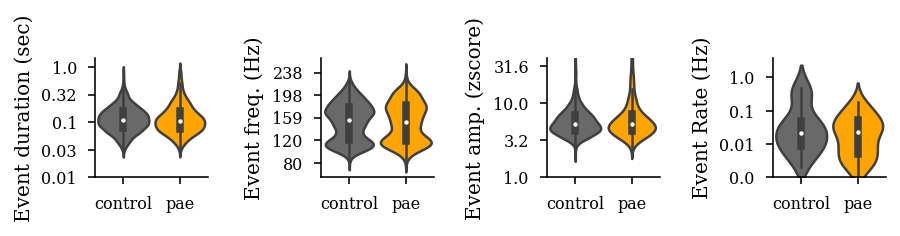

In [59]:
# # epoch_idx = ((df.ep_type == 'track') | (df.ep_type == 'pedestal_1') | (df.ep_type == 'pedestal_2'))
# # epoch = "track_pedstal"
# epoch_idx = (df.ep_type == df.ep_type) & (df.area == 'ca1')
# epoch_df_inter_ripple_idx = (df_inter_ripple.area == 'ca1')

# epoch = "all_ca1"


# def log_y_axis(ax,y,round_n=2,n_steps=5):
#     """
#     function to space Y axis in log scale without logging y values
#     """
#     y_log = np.linspace(math.floor(min(y)),math.ceil(max(y)),n_steps)
#     ax.set_yticks(y_log)
#     ax.set_yticklabels(np.round(10**y_log,round_n))
    
# fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.2, subplots=(1, 4)), edgecolor='k')
# fig.subplots_adjust(hspace = 0, wspace=1)
# axs = axs.ravel()

# # set params
# x = 'group'
# linewidth = 1.25
# width = .9

# # Create an array with the colors you want to use
# colors = ['dimgrey','#ffa500ff']
# # colors = ['dimgrey','gold']


# # Set your custom color palette
# sns.set_palette(sns.color_palette(colors))


# # plot
# df['ripple_duration_log10'] = [np.log10(value) for value in df.ripple_duration]
# axs[0] = sns.violinplot(x=x, y="ripple_duration_log10", data=df[epoch_idx],
#                linewidth=linewidth,width=width,ax=axs[0],saturation=1)
# axs[0].set_ylabel('Event duration (sec)')
# log_y_axis(axs[0],df.ripple_duration_log10)   
# axs[0].set_ylim(bottom=np.log10(0.01))



# axs[1] = sns.violinplot(x=x, y="peak_freq", data=df[epoch_idx],
#                linewidth=linewidth,width=width,ax=axs[1],saturation=1)
# axs[1].set_yticks(np.round(np.linspace(math.floor(min(df.peak_freq)),math.ceil(max(df.peak_freq)),5)))
# axs[1].set_ylabel('Event freq. (Hz)')



# df['peak_amplitude_log10'] = [np.log10(value) for value in df.peak_amplitude]
# axs[2] = sns.violinplot(x=x, y="peak_amplitude_log10", data=df[epoch_idx], # make so less than 20
#                linewidth=linewidth,width=width,ax=axs[2],saturation=1)
# log_y_axis(axs[2],df.peak_amplitude_log10,round_n=1,n_steps=7)   
# axs[2].set_ylim(top=np.log10(40))
# axs[2].set_ylabel('Event amp. (zscore)')



# df_inter_ripple['ripple_rate_log10'] = [np.log10(value) for value in df_inter_ripple.ripple_rate]
# axs[3] = sns.violinplot(x=x, y="ripple_rate_log10", data=df_inter_ripple[epoch_df_inter_ripple_idx],
#                linewidth=linewidth,width=width,ax=axs[3],saturation=1)
# log_y_axis(axs[3],df_inter_ripple.ripple_rate_log10)   
# axs[3].set_ylim(bottom=np.log10(0.001))
# axs[3].set_ylabel('Event Rate (Hz)')

# # clean up  box
# for i in range(4):
#     right_side = axs[i].spines["right"]
#     right_side.set_visible(False)
#     top_side = axs[i].spines["top"]
#     top_side.set_visible(False)
#     axs[i].set_xlabel('')

# save_path = "D:/ryanh/GoogleDrive/school_work/UNM/Lab/Projects/Dissertation/dissertation/inkscape_figs/ripple_section/"
# plt.savefig(save_path+'ripple_features_'+epoch+'.svg',dpi=900,bbox_inches='tight')
# plt.savefig(save_path+'ripple_features_'+epoch+'.pdf',dpi=900,bbox_inches='tight')

In [268]:
df

,Unnamed: 0,Unnamed: 0.1,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,ep_type,group,area,ripple_duration_log10,peak_amplitude_log10
0,0,0,22,211.247200,211.327200,0.080000,0.990871,211.296000,3,5.566472,213.605249,0.000000,LEM3116_S20180715121821,track,control,ca1,-1.096910,0.745580
1,1,1,60,517.919200,518.311200,0.392000,0.995188,518.087200,7,29.168512,203.155556,0.000000,LEM3116_S20180715121821,track,control,ca1,-0.406714,1.464914
2,2,2,72,607.938400,608.326400,0.388000,0.990928,607.964000,3,7.932019,103.616382,0.000000,LEM3116_S20180715121821,track,control,ca1,-0.411168,0.899384
3,3,3,80,675.985600,676.139200,0.153600,0.994272,676.074400,7,5.077734,173.913383,0.000000,LEM3116_S20180715121821,track,control,ca1,-0.813609,0.705670
4,4,4,100,933.226400,933.424000,0.197600,0.992893,933.278400,7,27.285162,119.721685,0.000000,LEM3116_S20180715121821,pedestal_2,control,ca1,-0.704213,1.435927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,17540,17818,25,255.450400,255.599200,0.148800,0.314032,255.533600,7,8.094016,105.746020,0.000000,RH16_S20161126145021,track,pae,ca1,-0.827397,0.908164
17541,17541,17819,22,149.384000,149.505600,0.121600,0.133732,149.436800,6,12.060743,186.017137,0.000000,RH16_S20161126150318,track,pae,ca1,-0.915066,1.081374
17542,17542,17820,32,233.419200,233.576000,0.156800,0.260312,233.496000,7,8.145433,110.793201,0.000000,RH16_S20161126150318,track,pae,ca1,-0.804654,0.910914
17543,17543,17821,36,270.288000,270.410400,0.122400,0.065024,270.328800,0,4.390508,174.380797,0.000000,RH16_S20161126150318,track,pae,ca1,-0.912219,0.642515


In [269]:
# pd.unique(df.session)
# session = df.session.iloc[0]
# session.split('_')[0]
rat = [s.split('_')[0] for s in df.session]
df['rat']=rat

In [15]:
df.nunique()

Unnamed: 0               17397
ripple_number             2166
start_time               17397
end_time                 17368
ripple_duration           2534
max_emg                  17340
peak_time                17370
peak_channel                64
peak_amplitude           17397
peak_freq                17397
clipped                      8
session                    189
ep_type                      7
group                        2
ripple_duration_log10     2534
peak_amplitude_log10     17397
rat                         12
dtype: int64

In [16]:
control=('RH13','RH14','LS21','LS23','LE2821','LE2823','LEM3116','LEM3120','LEM3216')
pae=('RH11','RH16','LS17','LS19','LE2813','LEM3124','LEM3206','LEM3246')
for r in pd.unique(df.rat):
    print(r,sum(df.rat == r))

LEM3116 1487
LEM3120 452
LEM3124 917
LEM3206 2499
LEM3216 7264
LEM3246 4118
LS17 250
LS19 235
LS23 120
RH13 11
RH14 10
RH16 34


In [17]:
for g in pd.unique(df.group):
    print(g,sum(df.group == g))

control 9344
pae 8053


In [270]:
# df_inter_ripple.to_csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/df_ripple_rate.csv')
df.to_csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')


In [116]:
    
import pickle 

with open(r'F:\Projects\PAE_PlaceCell\analysis\swr_data\post_processed\swr_df_maps.pkl', 'rb') as f:
    _ = pickle.load(f)
    ripple_maps = pickle.load(f)
ripple_maps.keys()    

dict_keys(['ripple_map', 'filtered_map', 'phase_map', 'amp_map', 'freq_map'])

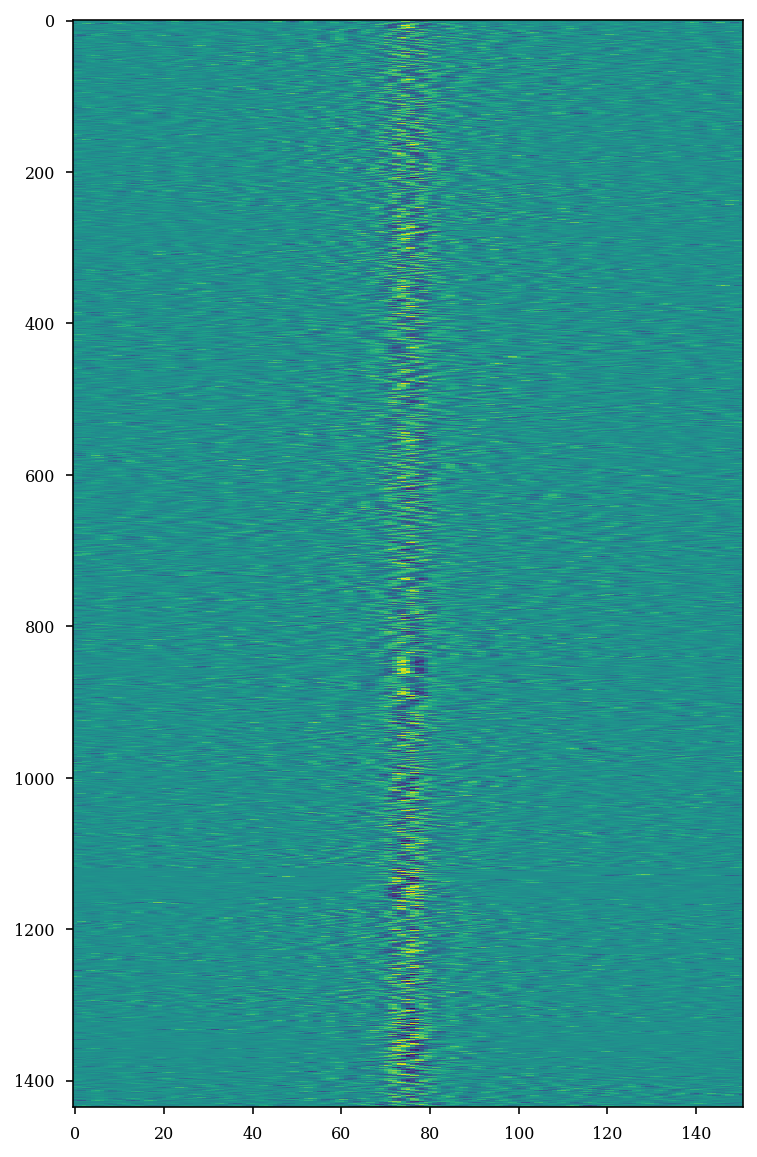

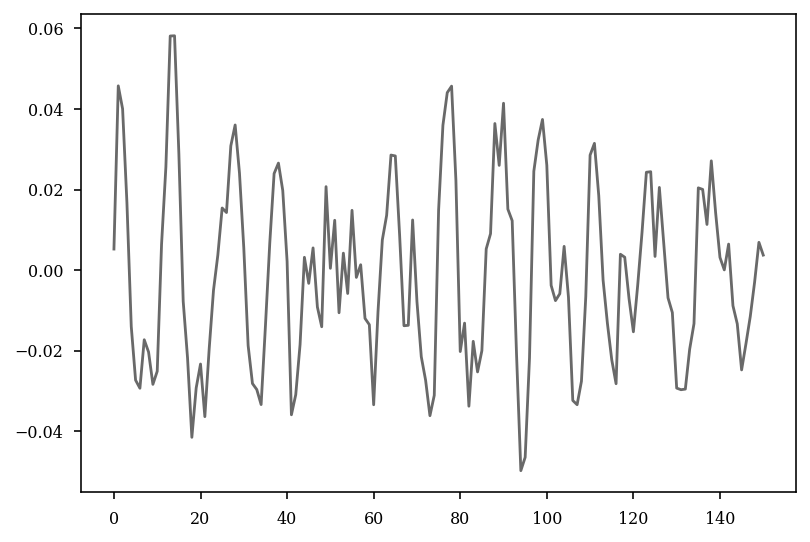

In [126]:
from scipy import stats

ripple_maps['ripple_map'].shape

idx = (df.group == 'pae') & (df.area == 'ca1')

plt.figure(figsize=(6,10))
plt.imshow(stats.zscore(ripple_maps['filtered_map'][idx,:],axis=1),aspect='auto')

plt.figure()
plt.plot(np.median(stats.zscore(ripple_maps['filtered_map'][idx,:],axis=0),axis=0))